In [1]:
import numpy as np
import glob
import cv2
from matplotlib import pyplot as plt
from imutils.object_detection import non_max_suppression

In [2]:
from google.colab import files
uploaded = files.upload()

Saving biden_fall_1.png to biden_fall_1.png
Saving biden_fall_2.png to biden_fall_2.png
Saving biden_fall_3.png to biden_fall_3.png


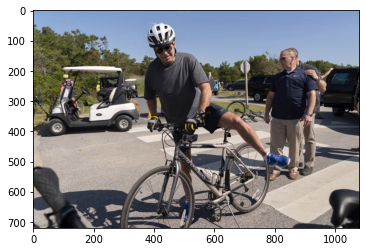

In [3]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
img1 = cv2.imread('biden_fall_1.png')
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))

<Figure size 432x288 with 0 Axes>

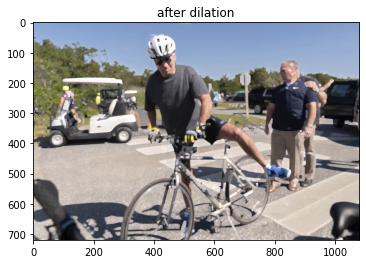

<Figure size 432x288 with 0 Axes>

In [4]:
kernel = np.ones((5,5), np.uint8)
result_dilate = cv2.dilate(img1, kernel, iterations=1)
plt.imshow(cv2.cvtColor(result_dilate,cv2.COLOR_BGR2RGB))
plt.title("after dilation")
plt.figure()



<Figure size 432x288 with 0 Axes>

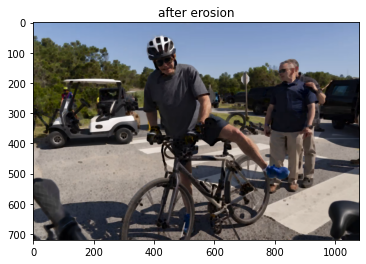

<Figure size 432x288 with 0 Axes>

In [5]:
result_erode = cv2.erode(img1, kernel, iterations=1)
plt.imshow(cv2.cvtColor(result_erode,cv2.COLOR_BGR2RGB))
plt.title("after erosion")
plt.figure()

<Figure size 432x288 with 0 Axes>

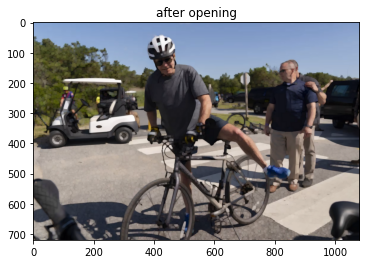

<Figure size 432x288 with 0 Axes>

In [6]:

result_open = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel)
plt.imshow(cv2.cvtColor(result_open,cv2.COLOR_BGR2RGB))
plt.title("after opening")
plt.figure()


<Figure size 432x288 with 0 Axes>

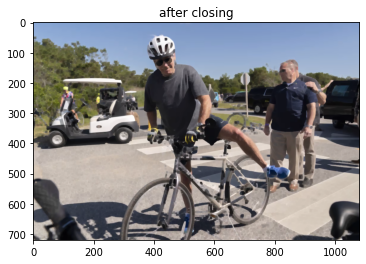

<Figure size 432x288 with 0 Axes>

In [7]:

result_closing = cv2.morphologyEx(img1, cv2.MORPH_CLOSE, kernel)
plt.imshow(cv2.cvtColor(result_closing,cv2.COLOR_BGR2RGB))
plt.title("after closing")
plt.figure()

<Figure size 432x288 with 0 Axes>

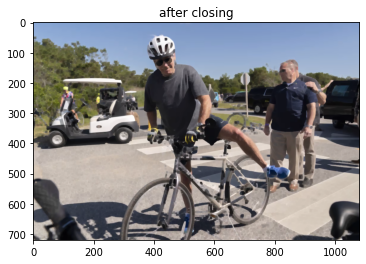

<Figure size 432x288 with 0 Axes>

In [8]:
result_closing = cv2.morphologyEx(result_closing, cv2.MORPH_CLOSE, kernel)
plt.imshow(cv2.cvtColor(result_closing,cv2.COLOR_BGR2RGB))
plt.title("after closing")
plt.figure()

#a)

<Figure size 432x288 with 0 Axes>

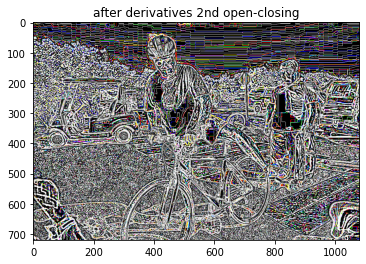

<Figure size 432x288 with 0 Axes>

In [10]:
result_g = (result_dilate/2) + (result_erode/2)
result_g = np.round_(result_g, decimals = 0, out = None)
result_g = np.array(result_g, dtype=np.uint8)
result_a = img1 - result_g
plt.imshow(cv2.cvtColor(result_a,cv2.COLOR_BGR2RGB))
plt.title("after derivatives 2nd open-closing")
plt.figure()

#b)

<Figure size 432x288 with 0 Axes>

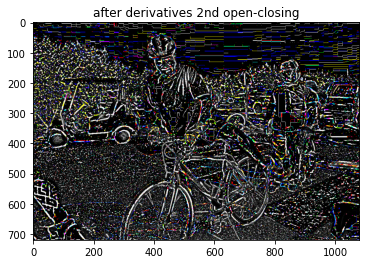

<Figure size 432x288 with 0 Axes>

In [11]:

open_a = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel)
open_close_a = cv2.morphologyEx(open_a , cv2.MORPH_CLOSE, kernel)
result_b = img1-open_close_a
plt.imshow(cv2.cvtColor(result_b,cv2.COLOR_BGR2RGB))
plt.title("after derivatives 2nd open-closing")
plt.figure()



#c)

<Figure size 432x288 with 0 Axes>

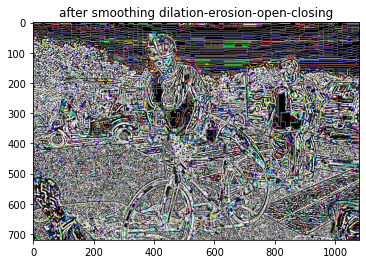

<Figure size 432x288 with 0 Axes>

In [12]:

open_a = cv2.morphologyEx(result_a, cv2.MORPH_OPEN, kernel)
open_close_b = cv2.morphologyEx(open_a , cv2.MORPH_CLOSE, kernel)
result_c = result_a-open_close_b
plt.imshow(cv2.cvtColor(result_c,cv2.COLOR_BGR2RGB))
plt.title("after smoothing dilation-erosion-open-closing")
plt.figure()


In [9]:
def avg(img1, img2):
    return cv2.addWeighted(img1, 0.5, img2, 0.5, 0)

def second_derivative(img1, img2):
    img1 = img1.astype(np.float32)
    img2 = img2.astype(np.float32)
    
    sub = np.subtract(img1, img2)
    
    minimum = sub.min()
    maximum = sub.max()
    
    return (np.divide(np.subtract(sub, minimum), (maximum - minimum)) * 255).astype(np.uint8)

<Figure size 432x288 with 0 Axes>

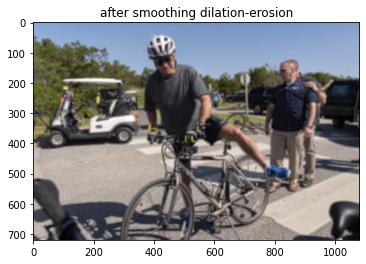

<Figure size 432x288 with 0 Axes>

In [16]:
smooth =avg(result_erode,result_dilate)
plt.imshow(cv2.cvtColor(smooth,cv2.COLOR_BGR2RGB))
plt.title("after smoothing dilation-erosion")
plt.figure()

<Figure size 432x288 with 0 Axes>

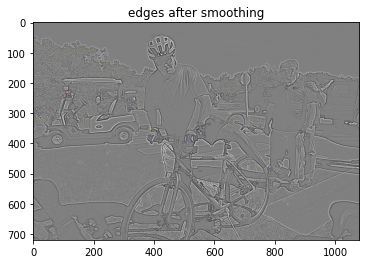

<Figure size 432x288 with 0 Axes>

In [17]:
edge_erdil = second_derivative(img1, smooth)
plt.imshow(cv2.cvtColor(edge_erdil,cv2.COLOR_BGR2RGB))
plt.title("edges after smoothing")
plt.figure()

#d)

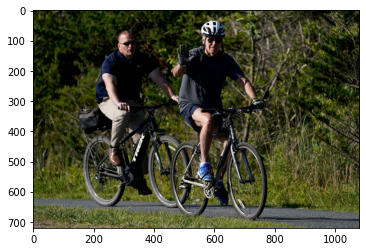

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
img2 = cv2.imread('biden_fall_2.png')
plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2RGB))

<Figure size 432x288 with 0 Axes>

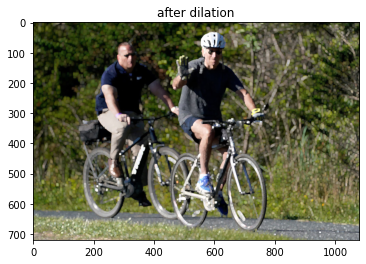

<Figure size 432x288 with 0 Axes>

In [ ]:
result_dilate2 = cv2.dilate(img2, kernel, iterations=1)
plt.imshow(cv2.cvtColor(result_dilate2,cv2.COLOR_BGR2RGB))
plt.title("after dilation")
plt.figure()



<Figure size 432x288 with 0 Axes>

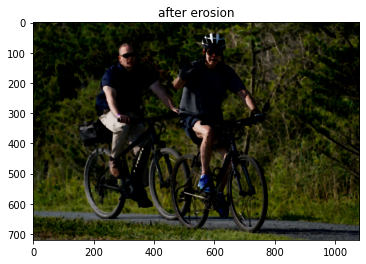

<Figure size 432x288 with 0 Axes>

In [ ]:
result_erode2 = cv2.erode(img2, kernel, iterations=1)
plt.imshow(cv2.cvtColor(result_erode2,cv2.COLOR_BGR2RGB))
plt.title("after erosion")
plt.figure()

<Figure size 432x288 with 0 Axes>

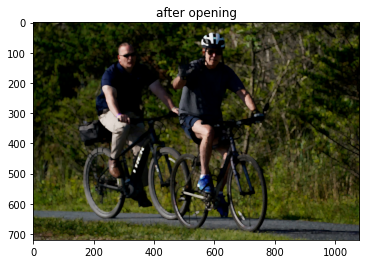

<Figure size 432x288 with 0 Axes>

In [ ]:
result_open2 = cv2.morphologyEx(img2, cv2.MORPH_OPEN, kernel)
plt.imshow(cv2.cvtColor(result_open2,cv2.COLOR_BGR2RGB))
plt.title("after opening")
plt.figure()


<Figure size 432x288 with 0 Axes>

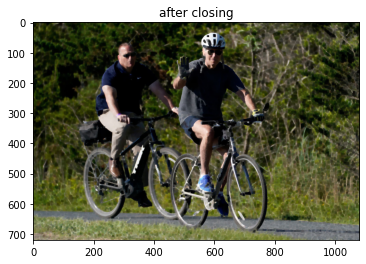

<Figure size 432x288 with 0 Axes>

In [ ]:
result_closing2 = cv2.morphologyEx(img2, cv2.MORPH_CLOSE, kernel)
plt.imshow(cv2.cvtColor(result_closing2,cv2.COLOR_BGR2RGB))
plt.title("after closing")
plt.figure()

<Figure size 432x288 with 0 Axes>

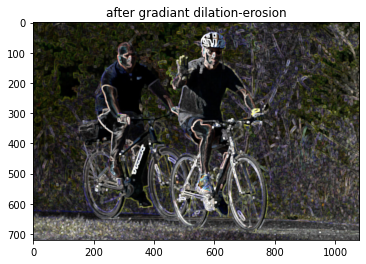

<Figure size 432x288 with 0 Axes>

In [ ]:
result_d= result_dilate2- result_erode2
plt.imshow(cv2.cvtColor(result_d,cv2.COLOR_BGR2RGB))
plt.title("after gradiant dilation-erosion")
plt.figure()

#e)

<Figure size 432x288 with 0 Axes>

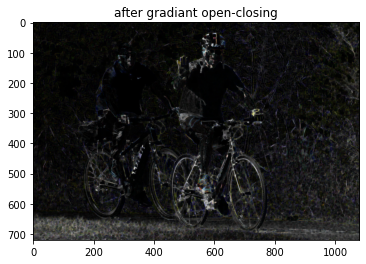

<Figure size 432x288 with 0 Axes>

In [ ]:
result_e= result_closing2- result_open2
plt.imshow(cv2.cvtColor(result_e,cv2.COLOR_BGR2RGB))
plt.title("after gradiant open-closing")
plt.figure()

#f)

<Figure size 432x288 with 0 Axes>

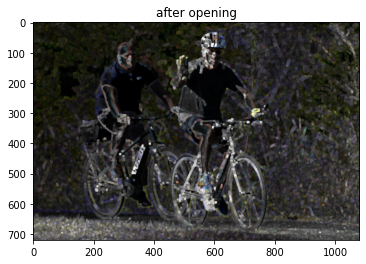

<Figure size 432x288 with 0 Axes>

In [ ]:
result_open22 = cv2.morphologyEx(result_d, cv2.MORPH_OPEN, kernel)
plt.imshow(cv2.cvtColor(result_open22,cv2.COLOR_BGR2RGB))
plt.title("after opening")
plt.figure()

<Figure size 432x288 with 0 Axes>

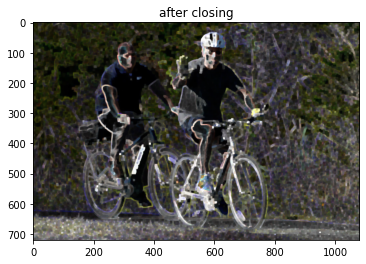

<Figure size 432x288 with 0 Axes>

In [ ]:
result_closing22 = cv2.morphologyEx(result_d, cv2.MORPH_CLOSE, kernel)
plt.imshow(cv2.cvtColor(result_closing22,cv2.COLOR_BGR2RGB))
plt.title("after closing")
plt.figure()

<Figure size 432x288 with 0 Axes>

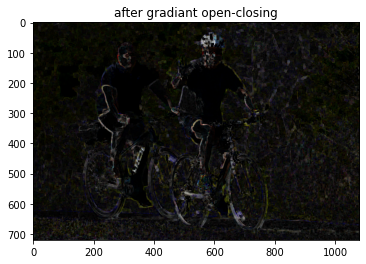

<Figure size 432x288 with 0 Axes>

In [ ]:
result_f= result_closing22- result_open22
plt.imshow(cv2.cvtColor(result_f,cv2.COLOR_BGR2RGB))
plt.title("after gradiant open-closing")
plt.figure()

#g)

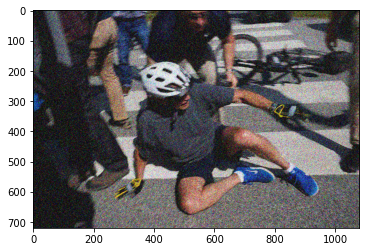

In [ ]:
img3 = cv2.imread('biden_fall_3.png')
plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))

<Figure size 432x288 with 0 Axes>

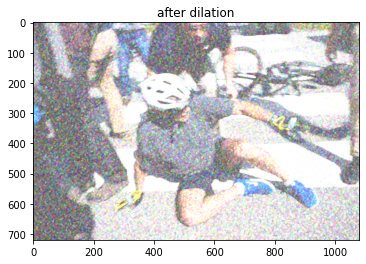

<Figure size 432x288 with 0 Axes>

In [ ]:
result_dilate3 = cv2.dilate(img3, kernel, iterations=1)
plt.imshow(cv2.cvtColor(result_dilate3,cv2.COLOR_BGR2RGB))
plt.title("after dilation")
plt.figure()

<Figure size 432x288 with 0 Axes>

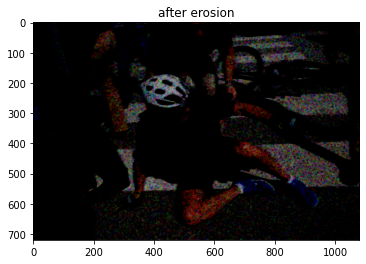

<Figure size 432x288 with 0 Axes>

In [ ]:
result_erode3 = cv2.erode(img3, kernel, iterations=1)
plt.imshow(cv2.cvtColor(result_erode3,cv2.COLOR_BGR2RGB))
plt.title("after erosion")
plt.figure()

<Figure size 432x288 with 0 Axes>

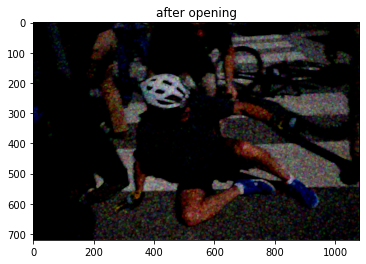

<Figure size 432x288 with 0 Axes>

In [ ]:
result_open3 = cv2.morphologyEx(img3, cv2.MORPH_OPEN, kernel)
plt.imshow(cv2.cvtColor(result_open3,cv2.COLOR_BGR2RGB))
plt.title("after opening")
plt.figure()


<Figure size 432x288 with 0 Axes>

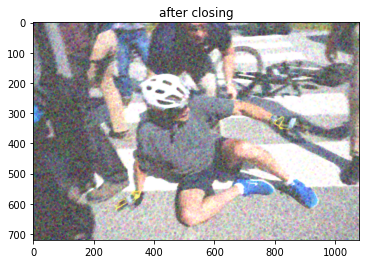

<Figure size 432x288 with 0 Axes>

In [ ]:
result_closing3 = cv2.morphologyEx(img3, cv2.MORPH_CLOSE, kernel)
plt.imshow(cv2.cvtColor(result_closing3,cv2.COLOR_BGR2RGB))
plt.title("after closing")
plt.figure()

<Figure size 432x288 with 0 Axes>

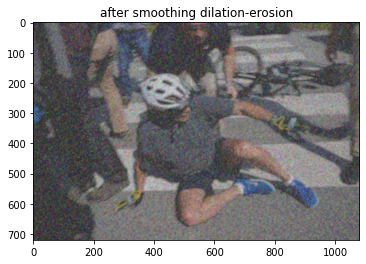

<Figure size 432x288 with 0 Axes>

In [ ]:
result_g = (result_dilate3/2) + (result_erode3/2)
result_g = np.round_(result_g, decimals = 0, out = None)
result_g = np.array(result_g, dtype=np.uint8)
plt.imshow(cv2.cvtColor(result_g,cv2.COLOR_BGR2RGB))
plt.title("after smoothing dilation-erosion")
plt.figure()

#h)

<Figure size 432x288 with 0 Axes>

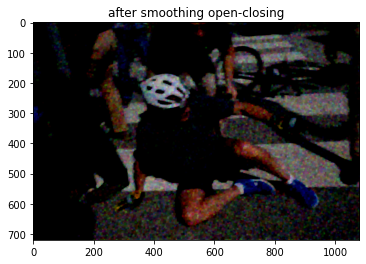

<Figure size 432x288 with 0 Axes>

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
result_h = cv2.morphologyEx(img3, cv2.MORPH_OPEN, kernel)
result_h = cv2.morphologyEx(result_h, cv2.MORPH_CLOSE, kernel)
plt.imshow(cv2.cvtColor(result_h,cv2.COLOR_BGR2RGB))
plt.title("after smoothing open-closing")
plt.figure()